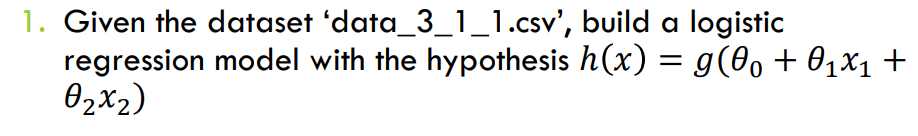

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('data_3_2.csv')
df

,x1,x2,class
0,10.52,0.65,3
1,1.46,-1.25,2
2,1.50,0.56,2
3,-1.36,2.50,0
4,11.16,5.19,1
...,...,...,...
295,8.39,0.92,3
296,11.54,1.40,3
297,13.23,-0.63,3
298,-1.10,2.69,0


In [5]:
df = df.to_numpy()
X = df[:,:-1] 
y= df[:,-1] 
print(X.shape)
print(y.shape)
X.mean(axis=0)

(300, 2)
(300,)


array([5.2358    , 2.22856667])

<b>`Feature scalling`

In [6]:
def scale(X):
    return (X-X.mean(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [7]:
X_scaled = scale(X)
X_scaled[:5]

array([[ 0.26381428, -0.13377684],
       [-0.18850724, -0.29479379],
       [-0.18651023, -0.14140395],
       [-0.32929606,  0.02300282],
       [ 0.29576635,  0.25096893]])

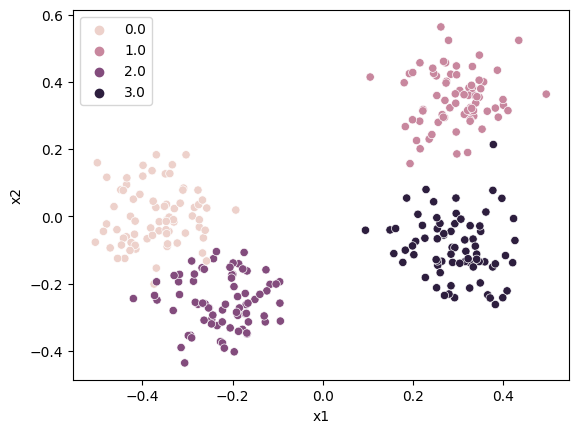

In [8]:
sns.scatterplot(x= X_scaled[:,0], y= X_scaled[:,1], hue =y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [9]:
x0 = np.ones((len(X),1))
X_new = np.concatenate((x0, X_scaled), axis=1)
X_new.shape

(300, 3)

In [18]:
def hyp(x, theta):
    z= np.matmul(x, theta)
    h= 1/(1+np.exp(-z))
    return h

theta = np.zeros((3,1))
print(hyp(X_new, theta))

[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]

`Define cost function ask 3 argumens involving : x , theta , y`

In [20]:
def cost(x, theta, y):
    c = -y.reshape((-1,1))*np.log(hyp(x,theta))-(1-y.reshape((-1,1)))*np.log(1-hyp(x,theta))
    c= c.mean()
    return c
print (cost(X_new, theta, y))

0.6931471805599453


`Define gradient descending methos `

In [21]:
def grad(x, theta, y):
    g = (hyp(x,theta) - y.reshape((-1,1))) * x
    g = 2 * (g.mean(axis = 0))
    return g.reshape((-1,1))

print(grad(X_new, theta, y))

[[-2.        ]
 [-0.36735896]
 [ 0.22020056]]


`Training data`

In [38]:
theta = np.zeros((3,1))
alpha = 10

for i in range (3):
    cost_value = cost(X_new, theta, y)
    theta += -alpha*grad(X_new, theta, y)
    print(cost_value)

0.6931471805599453
-10.91720447304278
-16.833425890457367


In [39]:
for i in range (3):
    cost_value = cost(X_new, theta, y)
    theta += -alpha*grad(X_new, theta, y)
    print(theta,'\n')

[[50.00000007]
 [14.69435845]
 [-8.8080226 ]] 

[[ 60.00000007]
 [ 18.36794806]
 [-11.01002825]] 

[[ 70.00000007]
 [ 22.04153768]
 [-13.2120339 ]] 



C:\Users\LH\AppData\Local\Temp\ipykernel_8700\1555069888.py:2: RuntimeWarning: divide by zero encountered in log
  c = -y.reshape((-1,1))*np.log(hyp(x,theta))-(1-y.reshape((-1,1)))*np.log(1-hyp(x,theta))
C:\Users\LH\AppData\Local\Temp\ipykernel_8700\1555069888.py:2: RuntimeWarning: invalid value encountered in multiply
  c = -y.reshape((-1,1))*np.log(hyp(x,theta))-(1-y.reshape((-1,1)))*np.log(1-hyp(x,theta))
